# Data wrangling WeRateDogs
#### by Mohamed Gamal


## Contents
- [Introduction](#intro)
- [Gathering data](#gather)
   - [source one](#source1)
   - [source two](#source2)
   - [source three](#source3)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one](#one)
   - [Insight two and visualization](#two)
   - [Insight three](#three)
   - [Insight four ](#four)
   - [insight five and visualization](#five)

<a id='intro'></a>
## Introduction

in this project we will wrangle (WeRateDogs) data . (WeRateDogs) is a twitter account that spicialized in rating dogs . let's start 

In [2]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 

<a id=gather></a>
## Gathering Data

<a id='source1'></a>
## source one

In [3]:
#read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#test
twitter_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<a id='source2'></a>
## Source Two 

In [6]:
#Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open ('image-predictions.tsv' , mode = 'wb') as file:
    file.write(response.content)
#read tsv file 
image_prediction = pd.read_csv('image-predictions.tsv' , sep = '\t')

In [7]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id = 'source3'></a>
## source three

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [9]:
df_list = []
with open ('tweet-json.txt' , 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':fav_count})
api_df = pd.DataFrame(df_list)
api_df.sample(5)

,tweet_id,retweet_count,favorite_count
471,816450570814898180,9366,33961
968,750117059602808832,1466,4740
1630,684460069371654144,628,2169
564,802265048156610565,1573,7039
1429,697516214579523584,1282,2281


In [10]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<a id='assess'></a>
## Assessing Data

## visual assessment

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## programmatic assessment

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [16]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 121, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 960, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [19]:
print(twitter_archive['text'][1120])
print(twitter_archive['text'][1635])
print(twitter_archive['text'][313])
print(twitter_archive['text'][1779])
print(twitter_archive['text'][214])

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
This is Iggy. He was a rescue dog killed in the Stockholm attack. His memorial started with a collar and four bones. It's grown a bit. 14/10 https://t.co/E4a0R9my1M


In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 150, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 90, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

902    Why does this never happen at my front door......
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [22]:
print(twitter_archive['text'][902])
print(twitter_archive['text'][1228])
print(twitter_archive['text'][1663])
print(twitter_archive['text'][2335])
print(twitter_archive['text'][516])

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [23]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
525,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1488,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False


In [24]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
sum(image_prediction.jpg_url.duplicated())

66

In [26]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [27]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
api_df.sample(20)

,tweet_id,retweet_count,favorite_count
992,748568946752774144,776,2411
591,798933969379225600,5203,14712
1687,681340665377193984,313,1803
1789,677335745548390400,2017,3328
1532,689993469801164801,518,1618
1310,707014260413456384,664,2502
793,773336787167145985,5912,0
1298,707693576495472641,1133,3765
1193,717421804990701568,945,3446
797,772877495989305348,4501,9555


In [59]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [60]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


<a id='quality'></a>
## Quality

*Completeness, validity, accuracy, consistency (content issues)*

###  twitter_archive
- Keep original ratings (no retweets) that have images
- Delete columns that won't be used for analysis
- Erroneous datatypes (doggo, floofer, pupper and puppo columns)
- Correct numerators with decimals
- Correc denominators other than 10

### image_prediction
- Drop 66 jpg_url duplicated
- Create 1 column for image prediction and 1 column for confidence level
- Delete columns that won't be used for analysis 

<a id='tidiness'></a>
### Tidiness 

- (twitter_archive)Separate timestamp into day - month - year (3 columns)
- use tweet_id as type int24 to merge all tabels in one data set

<a id='clean'></a>
## Cleaning Data

In [159]:
#make a copy from all data sets
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
api_df_clean = api_df.copy()

In [160]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [161]:
#test
sum(twitter_archive_clean.retweeted_status_user_id.value_counts())

0

In [162]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [163]:
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'] , 1)

In [164]:
#test
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [165]:
#Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],var_name='dogs', value_name='dogs_stage')

twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#Sort by dogs_stage then drop duplicated based on tweet_id 
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id')

In [166]:
#test
twitter_archive_clean['dogs_stage'].value_counts()

None    2175
Name: dogs_stage, dtype: int64

In [167]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [168]:
# test
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

In [169]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)


In [170]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 7277
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [171]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
5860,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
5883,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0
4392,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
4908,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
7142,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0


In [172]:
#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27

In [173]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
5860,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
5883,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4392,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
4908,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
7142,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


In [174]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
5769,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
5834,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20.0,16.0
5833,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0
5806,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
5805,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
5950,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
5445,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
5374,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
5425,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
5400,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0


In [175]:
#correct poth rating_numerator and rating_denominator
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 686035780142297088),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682808988178739200),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 684222868335505415),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 684225744407494656),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 677716515794329600),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 709198395643068416),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801),'rating_numerator']= 11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 710658690886586372),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 713900603437621249),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 697463031882764288),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 704054845121142784),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296),'rating_numerator']= 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 675853064436391936),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 835246439529840640),'rating_numerator']= 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 835246439529840640),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 820690176645140481),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 832088576586297345),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 758467244762497024),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 731156023742988288),'rating_denominator']= 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656),'rating_numerator']= 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656),'rating_denominator']= 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 810984652412424192),'rating_denominator']= 10

In [176]:
#test
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator


In [177]:
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)


In [178]:
twitter_archive_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
5790,684959798585110529,This is Jerry. He's a neat dog. No legs (tragi...,5.0,10.0,Jerry,None,2016,1,7,5.0
6265,670778058496974848,"""To bone or not to bone?""\n10/10 https://t.co/...",10.0,10.0,None,None,2015,11,29,10.0
5725,688898160958271489,When you have a ton of work to do but then rem...,10.0,10.0,None,None,2016,1,18,10.0
6357,668981893510119424,Unique dog here. Oddly shaped tail. Long pink ...,4.0,10.0,None,None,2015,11,24,4.0
6547,887473957103951883,This is Canela. She attempted some fancy porch...,13.0,10.0,Canela,None,2017,7,19,13.0
4869,793180763617361921,This is Newt. He's a strawberry. 11/10 https:/...,11.0,10.0,Newt,None,2016,10,31,11.0
4891,789628658055020548,This is Eli. He can fly. 13/10 magical af http...,13.0,10.0,Eli,None,2016,10,22,13.0
5497,706153300320784384,This is Layla. She's giving you a standing ova...,13.0,10.0,Layla,None,2016,3,5,13.0
5220,743253157753532416,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,None,2016,6,16,10.0
5871,680959110691590145,This is Ozzie. He was doing fine until he lost...,9.0,10.0,Ozzie,None,2015,12,27,9.0


In [179]:
list(image_prediction_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [180]:
#Drop 66 jpg_url duplicated
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'])

In [181]:
#test
sum(image_prediction_clean['jpg_url'].duplicated())

0

In [182]:
#Create 1 column for image prediction and 1 column for confidence level
dog_type=[]
conf_test=[]

def prediction(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        conf_test.append(image_prediction_clean['p1_conf']) 
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        conf_test.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        conf_test.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        conf_test.append('Error')
        
image_prediction_clean.apply(prediction , axis= 1)

image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['conf_test'] = conf_test
        

In [183]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2009 non-null   int64  
 1   jpg_url    2009 non-null   object 
 2   img_num    2009 non-null   int64  
 3   p1         2009 non-null   object 
 4   p1_conf    2009 non-null   float64
 5   p1_dog     2009 non-null   bool   
 6   p2         2009 non-null   object 
 7   p2_conf    2009 non-null   float64
 8   p2_dog     2009 non-null   bool   
 9   p3         2009 non-null   object 
 10  p3_conf    2009 non-null   float64
 11  p3_dog     2009 non-null   bool   
 12  dog_type   2009 non-null   object 
 13  conf_test  2009 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 194.2+ KB


In [184]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['conf_test'] != 'Error']
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1691 non-null   int64  
 1   jpg_url    1691 non-null   object 
 2   img_num    1691 non-null   int64  
 3   p1         1691 non-null   object 
 4   p1_conf    1691 non-null   float64
 5   p1_dog     1691 non-null   bool   
 6   p2         1691 non-null   object 
 7   p2_conf    1691 non-null   float64
 8   p2_dog     1691 non-null   bool   
 9   p3         1691 non-null   object 
 10  p3_conf    1691 non-null   float64
 11  p3_dog     1691 non-null   bool   
 12  dog_type   1691 non-null   object 
 13  conf_test  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [185]:
list(image_prediction_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_type',
 'conf_test']

In [186]:
#drop columns we don't need for analysis
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


In [187]:
# test
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_type', 'conf_test']

In [188]:
#store cleaned dataframes [twitter_archive_clean , image_prediction_clean]in created (twitter_archive_image)
twitter_archive_image = pd.merge(twitter_archive_clean, image_prediction_clean,how = 'left', on = ['tweet_id'])

In [189]:
#test
twitter_archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
 9   rating              2175 non-null   float64
 10  jpg_url             1686 non-null   object 
 11  dog_type            1686 non-null   object 
 12  conf_test           1686 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 237.9+ KB


In [190]:
# keep rows that have image
twitter_archive_image = twitter_archive_image[twitter_archive_image['jpg_url'].notnull()]

In [191]:
#test
twitter_archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 3 to 2174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   int64  
 1   text                1686 non-null   object 
 2   rating_numerator    1686 non-null   float64
 3   rating_denominator  1686 non-null   float64
 4   name                1686 non-null   object 
 5   dogs_stage          1686 non-null   object 
 6   year                1686 non-null   int64  
 7   month               1686 non-null   int64  
 8   day                 1686 non-null   int64  
 9   rating              1686 non-null   float64
 10  jpg_url             1686 non-null   object 
 11  dog_type            1686 non-null   object 
 12  conf_test           1686 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 184.4+ KB


In [192]:
#store cleaned dataframes [twitter_archive_image , api_df_clean]in created (twitter_archive_master)
twitter_archive_master = pd.merge(twitter_archive_image, api_df_clean,how = 'left', on = ['tweet_id'])

In [244]:
twitter_archive_master

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,conf_test,retweet_count,favorite_count
0,685198997565345792,This is Alfie. That is his time machine. He's ...,11.0,10.0,Alfie,None,2016,1,7,11.0,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,Old_English_sheepdog,0.00967138,764,2566
1,685307451701334016,Say hello to Petrick. He's an Altostratus Floo...,11.0,10.0,Petrick,None,2016,1,8,11.0,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,Pomeranian,0.963176,496,2262
2,685315239903100929,I would like everyone to appreciate this pup's...,11.0,10.0,None,None,2016,1,8,11.0,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,chow,0.470162,1234,3676
3,685321586178670592,This is Rocky. He sleeps like a psychopath. 10...,10.0,10.0,Rocky,None,2016,1,8,10.0,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,Boston_bull,0.972483,735,2910
4,685325112850124800,"""Tristan do not speak to me with that kind of ...",10.0,10.0,None,None,2016,1,8,10.0,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,golden_retriever,0.586937,4535,10471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,756939218950160384,This is Jax. He is a majestic mountain pupper....,12.0,10.0,Jax,None,2016,7,23,12.0,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,golden_retriever,0.790371,2295,7342
1682,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10.0,Maggie,None,2016,7,31,12.0,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876,2173,6620
1683,751456908746354688,Here's a pupper that's very hungry but too laz...,12.0,10.0,None,None,2016,7,8,12.0,https://pbs.twimg.com/ext_tw_video_thumb/75145...,golden_retriever,0.714409,1127,3516
1684,751583847268179968,Please stop sending it pictures that don't eve...,5.0,10.0,None,None,2016,7,9,5.0,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,0.868304,1265,4849


In [193]:
#test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   int64  
 1   text                1686 non-null   object 
 2   rating_numerator    1686 non-null   float64
 3   rating_denominator  1686 non-null   float64
 4   name                1686 non-null   object 
 5   dogs_stage          1686 non-null   object 
 6   year                1686 non-null   int64  
 7   month               1686 non-null   int64  
 8   day                 1686 non-null   int64  
 9   rating              1686 non-null   float64
 10  jpg_url             1686 non-null   object 
 11  dog_type            1686 non-null   object 
 12  conf_test           1686 non-null   object 
 13  retweet_count       1686 non-null   int64  
 14  favorite_count      1686 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 210.8+

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [194]:
twitter_archive_master.to_csv('twitter_archive_master.csv' , index = False)

<a id='one'></a>
### Insight one 
#### top rated dog type

In [217]:
dog_type_mean = twitter_archive_master.groupby('dog_type').mean()


In [218]:
dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,retweet_count,favorite_count
dog_type,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,2016.333333,7.666667,11.000000,9.666667,5976.0000,17326.666667
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.750000,15.916667,9.833333,1393.7500,5280.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.250000,15.000000,10.312500,2310.8125,9380.187500
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,11.000000,1458.0000,7317.500000
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,11.500000,3078.5000,11127.500000


In [220]:
dog_type_mean['rating'].sort_values()


dog_type
Japanese_spaniel                5.000000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.333333
                                 ...    
Labrador_retriever             13.638889
chow                           14.166667
Great_Pyrenees                 14.666667
West_Highland_white_terrier    14.687500
soft-coated_wheaten_terrier    20.800000
Name: rating, Length: 113, dtype: float64

<a id ='two'></a>
### Insight two and visualization


In [225]:
# which type of dogs is the most common
twitter_archive_master['dog_type'].value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
EntleBucher               1
silky_terrier             1
standard_schnauzer        1
Bouvier_des_Flandres      1
clumber                   1
Name: dog_type, Length: 113, dtype: int64

Text(0, 0.5, 'Type of dog')

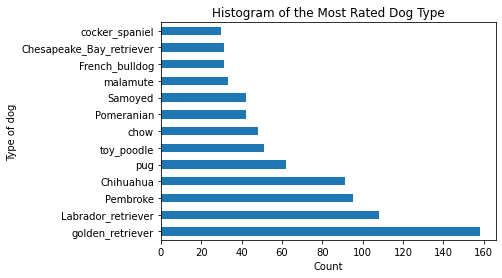

In [242]:
df_dog_type = twitter_archive_master.groupby('dog_type').filter(lambda x: len(x) >= 30)
df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

Text(0, 0.5, 'Type of dog')

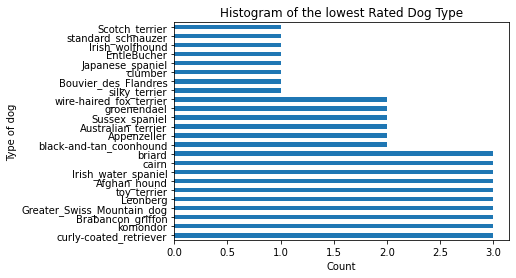

In [243]:
df_dog_type = twitter_archive_master.groupby('dog_type').filter(lambda x: len(x) <= 3)
df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the lowest Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

<a id = 'three'></a>
### insight three 


In [248]:
# type has the most retweets
dog_type_retweet = twitter_archive_master.groupby('dog_type').mean()
dog_type_retweet.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,retweet_count,favorite_count
dog_type,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,2016.333333,7.666667,11.000000,9.666667,5976.0000,17326.666667
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.750000,15.916667,9.833333,1393.7500,5280.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.250000,15.000000,10.312500,2310.8125,9380.187500
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,11.000000,1458.0000,7317.500000
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,11.500000,3078.5000,11127.500000


In [252]:
dog_type_retweet['retweet_count'].sort_values()

dog_type
groenendael            276.500000
Brabancon_griffon      287.666667
Japanese_spaniel       471.000000
Tibetan_terrier        557.750000
EntleBucher            706.000000
                         ...     
Saluki                5133.750000
English_springer      5401.600000
standard_poodle       5508.909091
Afghan_hound          5976.000000
Bedlington_terrier    7510.166667
Name: retweet_count, Length: 113, dtype: float64

<a id = 'four'></a>
### insight four 


In [266]:
# type has the most favourits
dog_type_favorits = twitter_archive_master.groupby('dog_type').mean()
dog_type_favorits.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,retweet_count,favorite_count
dog_type,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,2016.333333,7.666667,11.000000,9.666667,5976.0000,17326.666667
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.750000,15.916667,9.833333,1393.7500,5280.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.250000,15.000000,10.312500,2310.8125,9380.187500
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,11.000000,1458.0000,7317.500000
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,11.500000,3078.5000,11127.500000


In [267]:
dog_type_favorits['favorite_count'].sort_values()

dog_type
Brabancon_griffon         885.000000
groenendael              1156.500000
Japanese_spaniel         1362.000000
Irish_wolfhound          1534.000000
Tibetan_terrier          1841.000000
                            ...     
Afghan_hound            17326.666667
Bouvier_des_Flandres    18032.000000
French_bulldog          18416.806452
Bedlington_terrier      21153.166667
Saluki                  24060.000000
Name: favorite_count, Length: 113, dtype: float64

<a id = 'five'></a>
### insight five ans visualization

Text(0.5, 1.0, 'relation between retweet count and favorite count ')

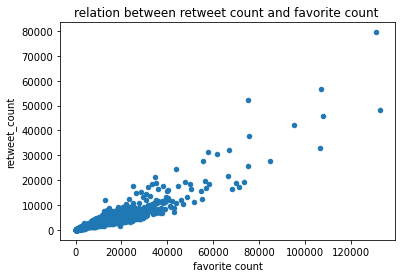

In [271]:
#relation between retweet count and favorite count
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter')
plt.xlabel('favorite count')
plt.ylabel('retweet_count')
plt.title('relation between retweet count and favorite count ')